In [1]:
#Import tensorflow and keras
import tensorflow as tf
from tensorflow import keras

In [3]:
#Check the tensorflow version after importing
print(tf.__version__)

2.0.0-rc0


In [4]:
#Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
#Load the MNIST Fashion dataset
mnist=keras.datasets.fashion_mnist

In [6]:
#Check the type of the dataset that was obtained in previous step
type(mnist)

tensorflow.python.util.module_wrapper.TFModuleWrapper

In [7]:
#Load this data into the noteboot
#This will be loaded as two Tuples by default
#One Tuple will be Training Dataset--- we name it as (X_train,y_train)
#Second Tuple will be Test Dataset---- we name it as (X_test,y_test)
(X_train,y_train),(X_test,y_test)=mnist.load_data()

4423680/4422102 [==============================] - 5s 1us/step


In [8]:
#View the shape of X_train
X_train.shape

(60000, 28, 28)

In [11]:
#View the shape of y_train
y_train.shape

(60000,)

In [12]:
#View the shape of X_test
X_test.shape

(10000, 28, 28)

In [13]:
#View the shape of y_test
y_test.shape

(10000,)

In [15]:
#View the X_train
X_train
#As the dataset comprises grey scale images,most of the values are zeroes

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [16]:
#View the maximum value in X_train
np.max(X_train)
#255 because the images are represented in the form of pixels with value between 0 to 255

255

In [17]:
#View the average value in X_train
np.mean(X_train)

72.94035223214286

In [18]:
#View the shape of X_train and y_train
X_train.shape,y_train.shape

((60000, 28, 28), (60000,))

In [19]:
#The data is classified into 10 labels meaning there are 10 types of clothes
#present in this dataset. These are encoded as labels
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [20]:
#View all the labels that y_train is containing
#This is nothing but the class of labels
#0	T-shirt/top
#1	Trouser
#2	Pullover
#3	Dress
#4	Coat
#5	Sandal
#6	Shirt
#7	Sneaker
#8	Bag
#9	Ankle boot
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [21]:
#Store the label names
class_names=['Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [22]:
class_names

['Top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

# EDA

In [23]:
#We have 60000 images available for training
X_train.shape,y_train.shape

((60000, 28, 28), (60000,))

In [24]:
#We have 10000 images available for testing
X_test.shape,y_test.shape

((10000, 28, 28), (10000,))

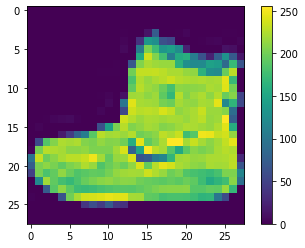

In [29]:
#View first image in X_train
plt.figure()
plt.imshow(X_train[0])
plt.colorbar()
#The color bar is showing the pixel values in the range 0----->255
# IN X-Axis,Y-axis the values are 28*28 meaning
#The image is represented in 28*28 matrice with pixel values ranging between 0---255

In [26]:
#To know what it is let us check the first label
y_train[0]
#9	Ankle boot

9

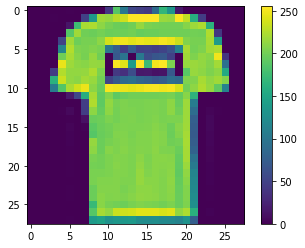

In [30]:
#View second image in X_train
plt.figure()
plt.imshow(X_train[1])
plt.colorbar()

In [28]:
#To know what it is let us check the second label
y_train[1]
#0	T-shirt/top

0

In [32]:
#Since, Neural Network Model doesn't take values more than 1
#The image pixel values are represented between the values 0 and 255
#We will bring this window to somewhere between zero and one
#So we divide the pixel values by 255
#This is performed on the entire dataset i.e. X_train,X_test
#Bring down the value of X_train to the range 0---->1
X_train=X_train/255.0

In [33]:
#Bring down the value of X_test to the range 0---->1
X_test=X_test/255.0

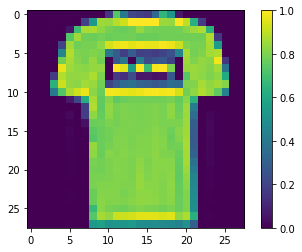

In [37]:
# Now, let us view the same figure
plt.figure()
plt.imshow(X_train[1])
plt.colorbar()
#We notice the image is same. But, the color bar calibration changed
#from 0---->255 to 0---->1

# Model Building

In [38]:
#Code for Neural Network Layers
#import the keras and sequential layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense

In [39]:
#We pass the layers to the sequential model
model=Sequential([
    
])

In [40]:
#Flatten Layer- 
###It transforms the 28*28 matrice to 1-D
###So that it can be fed to next layer

#Dense Layer
###Units is number of neurons that we want
###We are passing 128 neurons in the first layer
###Activation function we are using here is relu

#Output Layer
### We have 10 classes, so there will be 10 neurons
###Activation function we use here is softmax
model=Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [41]:
#Model Summary
model.summary()
#Output of flatten layer is 784. This is because the 28*28 is converted into a single dimension
#This is fed to the dense layer containing 128 neurons. The output here will be 128*784
#The output layer is having 10 neurons. So 10*128 approx 1290 results

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


# Model Compile
- Loss Function: 
    - Measure how accurate is the model during     training and testing
    - Loss function minimises error during the training
    - Then testing error also will be minimized(not always true)
    - Because, if the model is overfit, overall loss will be minimized during training, but the loss increases during testing
    - So, this is where optimizer comes
- Optimizer
- Metrics

In [43]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

# Train the model

In [44]:
model.fit(X_train,y_train,epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 75us/sample - loss: 0.4981 - accuracy: 0.8235
Epoch 2/10
60000/60000 [==============================] - 4s 72us/sample - loss: 0.3762 - accuracy: 0.8648
Epoch 3/10
60000/60000 [==============================] - 4s 67us/sample - loss: 0.3373 - accuracy: 0.8766
Epoch 4/10
60000/60000 [==============================] - 4s 70us/sample - loss: 0.3141 - accuracy: 0.8842
Epoch 5/10
60000/60000 [==============================] - 5s 75us/sample - loss: 0.2985 - accuracy: 0.8905
Epoch 6/10
60000/60000 [==============================] - 4s 74us/sample - loss: 0.2810 - accuracy: 0.8965
Epoch 7/10
60000/60000 [==============================] - 4s 70us/sample - loss: 0.2694 - accuracy: 0.8997
Epoch 8/10
60000/60000 [==============================] - 4s 71us/sample - loss: 0.2610 - accuracy: 0.9028
Epoch 9/10
60000/60000 [==============================] - 4s 70us/sample - loss: 0.2492 - accuracy: 0.9073
Epoch 10/10
60

# Model Evaluation

In [45]:
#Accuracy of test data
test_loss,test_acc=model.evaluate(X_test,y_test)
print(test_acc)
#During training, the accuracy was 91.03%
#In the testing, the accuracy is 88.32% which is ok
#This shows overfitting of our model
#This is a very simple single layer Neural Network Model
#Single hidden layer with 128 neurons

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.8832


# Prediction

In [46]:
from sklearn.metrics import accuracy_score

In [47]:
y_pred=model.predict_classes(X_test)

In [48]:
accuracy_score(y_test,y_pred)

0.8832

In [51]:
#Here we are predicting the class of the output and not an entire image as output
y_pred

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [49]:
#Make prediction on a random test image
pred=model.predict(X_test)

In [50]:
pred

array([[3.27155453e-06, 1.56119995e-09, 3.71720603e-07, ...,
        1.08223930e-02, 7.98741553e-08, 9.88939822e-01],
       [1.55480157e-05, 6.89573114e-14, 9.92882013e-01, ...,
        1.10448819e-15, 8.55104543e-10, 3.65006385e-14],
       [1.17209609e-09, 1.00000000e+00, 1.08032056e-10, ...,
        1.29841498e-27, 6.95271833e-15, 1.65706693e-18],
       ...,
       [2.81441840e-04, 7.98943045e-09, 8.79500294e-04, ...,
        2.38221620e-08, 9.96364534e-01, 5.98903251e-14],
       [3.64309050e-09, 9.99997854e-01, 3.42918827e-09, ...,
        3.02106841e-17, 2.17107651e-10, 1.71393767e-11],
       [1.03246457e-05, 2.62322573e-07, 5.15002694e-06, ...,
        2.79668136e-03, 2.33656992e-05, 1.05956569e-05]], dtype=float32)

In [52]:
pred[0]
#The maximum value is at the last place 9.8893982 e-01
#So, the probability of the item present in pred[0] belonging to
#last class i.e. class 9 is high when compared to other classes

array([3.2715545e-06, 1.5611999e-09, 3.7172060e-07, 1.7255580e-09,
       2.2283389e-07, 2.3362806e-04, 1.5811976e-07, 1.0822393e-02,
       7.9874155e-08, 9.8893982e-01], dtype=float32)

In [53]:
#Instead of we going through the results manually and indentifying 
#the location that is having maximum value in the above result
#let us use argmax, to identify which location in the above output is having
#maximum value
#zero is repering to the model predicted calss of first image
np.argmax(pred[0])

9

In [54]:
#Model predicted class of second image in the test set
np.argmax(pred[1])

2